In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pokemon=pd.read_csv('/content/drive/MyDrive/Downloads/pokemon.csv')

In [ ]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


# Bar plot using Seaborn

seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)

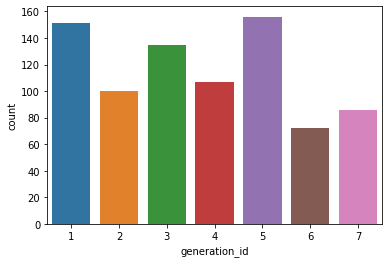

In [ ]:
sns.countplot(data=pokemon,x='generation_id');

##  Create a vertical bar chart using Seaborn, with a uniform single color

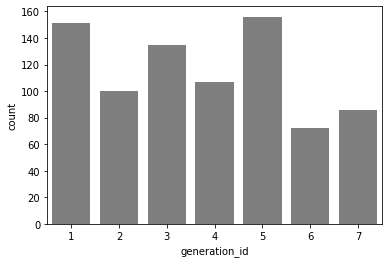

In [ ]:
base_color=sns.color_palette()[7]
sns.countplot(data=pokemon ,x='generation_id' , color=base_color)

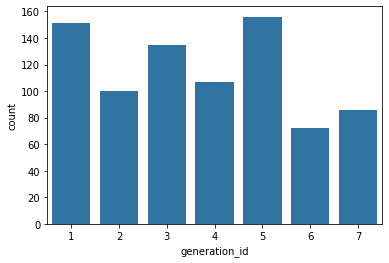

In [ ]:
base_color1=sns.color_palette()[0]
sns.countplot(data=pokemon ,x='generation_id' , color=base_color1)

## Static and dynamic ordering of the bars in a bar chart using seaborn.countplot()

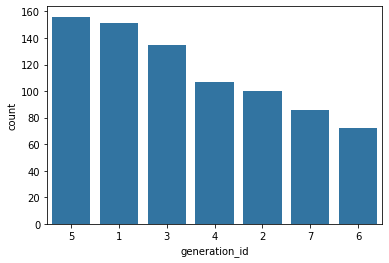

In [ ]:
freq=pokemon['generation_id'].value_counts()
automatic_ordering=freq.index
sns.countplot(data=pokemon ,x='generation_id',color=base_color1 ,order=automatic_ordering)

## Rotatin the categorical label(not axis)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

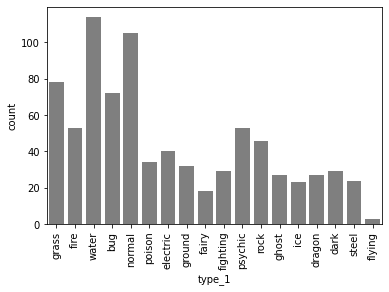

In [ ]:
sns.countplot(data=pokemon,x='type_1',color=base_color)
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

## Rotate the axes clockwise

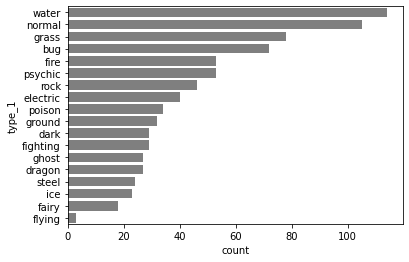

In [ ]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sns.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

# Bar plot using matplotlib

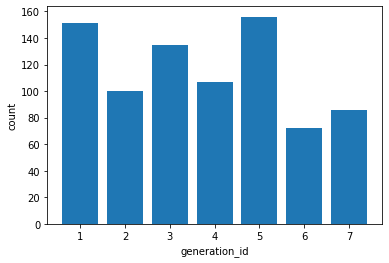

In [ ]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

# Absolute vs. Relative Frequency


## By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of the proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

## One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the count's axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

In [ ]:
pkmn=pokemon.melt(id_vars=['id', 'species'], value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [ ]:
# Find the frequency of unique values in the type column
pkmn_count=pkmn['type'].value_counts()
pkmn_count

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [ ]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
pkmn_order=pkmn_count.index
pkmn_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

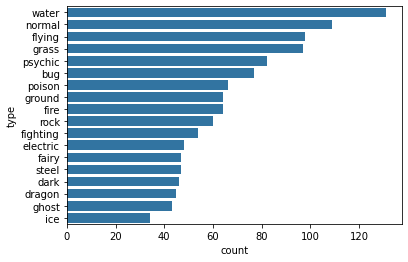

In [ ]:
# Plot the horizontal bar charts
base_color=sns.color_palette()[0]
sns.countplot(data=pkmn, y='type', color=base_color, order=pkmn_order);

##  Plot a bar chart having the proportions, instead of the actual count, on one of the axes.

In [ ]:
# Find the maximum proportion of bar
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = pkmn_count[0]


# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [ ]:
# Create an array of evenly spaced proportioned values
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [ ]:
# Create a list of String values that can be used as tick labels.
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names


['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

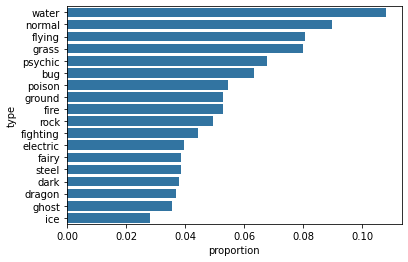

In [ ]:
#  Plot the bar chart, with new x-tick labels
sns.countplot(data=pkmn, y='type', color=base_color, order=pkmn_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

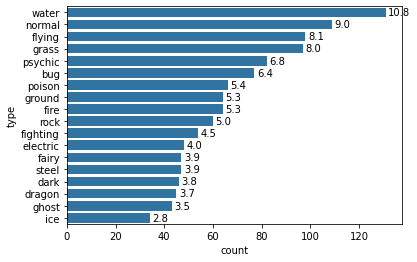

In [ ]:
#  Print the text (proportion) on the bars of a horizontal plot.
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn, y='type', color=base_color, order=pkmn_order);

# Logic to print the proportion text on the bars
for i in range (pkmn_count.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = pkmn_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

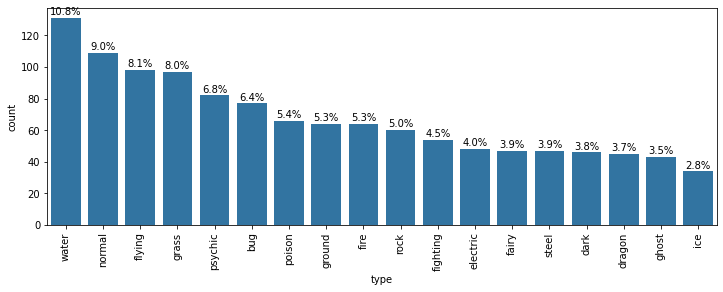

In [ ]:
# Print the text (proportion) below the bars of a Vertical plot.
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn, x='type', color=base_color, order=pkmn_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn['type'].value_counts()


# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

In [ ]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4